# MNIST Handwritten Digit Classification Dataset Analysis

This notebook analyzes the Kaggle Digit Recognizer dataset.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

## 2. Load Data

In [2]:
# Load datasets
train_df = pd.read_csv('digit-recognizer/train.csv')
test_df = pd.read_csv('digit-recognizer/test.csv')

print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

Training set shape: (42000, 785)
Test set shape: (28000, 784)


In [3]:
# Preview data
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Basic Information

In [4]:
print("=" * 60)
print("Dataset Basic Information")
print("=" * 60)
print(f"Training samples: {len(train_df):,}")
print(f"Test samples: {len(test_df):,}")
print(f"Image dimensions: 28 x 28 = 784 pixels")
print(f"Pixel value range: 0-255 (grayscale)")
print(f"Number of classes: {train_df['label'].nunique()}")
print()

# Check missing values
print("Missing values check:")
print(f"Train missing values: {train_df.isnull().sum().sum()}")
print(f"Test missing values: {test_df.isnull().sum().sum()}")

Dataset Basic Information
Training samples: 42,000
Test samples: 28,000
Image dimensions: 28 x 28 = 784 pixels
Pixel value range: 0-255 (grayscale)
Number of classes: 10

Missing values check:
Train missing values: 0
Test missing values: 0


## 4. Class Distribution Analysis

In [5]:
# Class distribution
label_counts = train_df['label'].value_counts().sort_index()

print("Samples per class:")
for digit, count in label_counts.items():
    pct = (count / len(train_df)) * 100
    print(f"Digit {digit}: {count:5,} samples ({pct:5.2f}%)")

Samples per class:
Digit 0: 4,132 samples ( 9.84%)
Digit 1: 4,684 samples (11.15%)
Digit 2: 4,177 samples ( 9.95%)
Digit 3: 4,351 samples (10.36%)
Digit 4: 4,072 samples ( 9.70%)
Digit 5: 3,795 samples ( 9.04%)
Digit 6: 4,137 samples ( 9.85%)
Digit 7: 4,401 samples (10.48%)
Digit 8: 4,063 samples ( 9.67%)
Digit 9: 4,188 samples ( 9.97%)


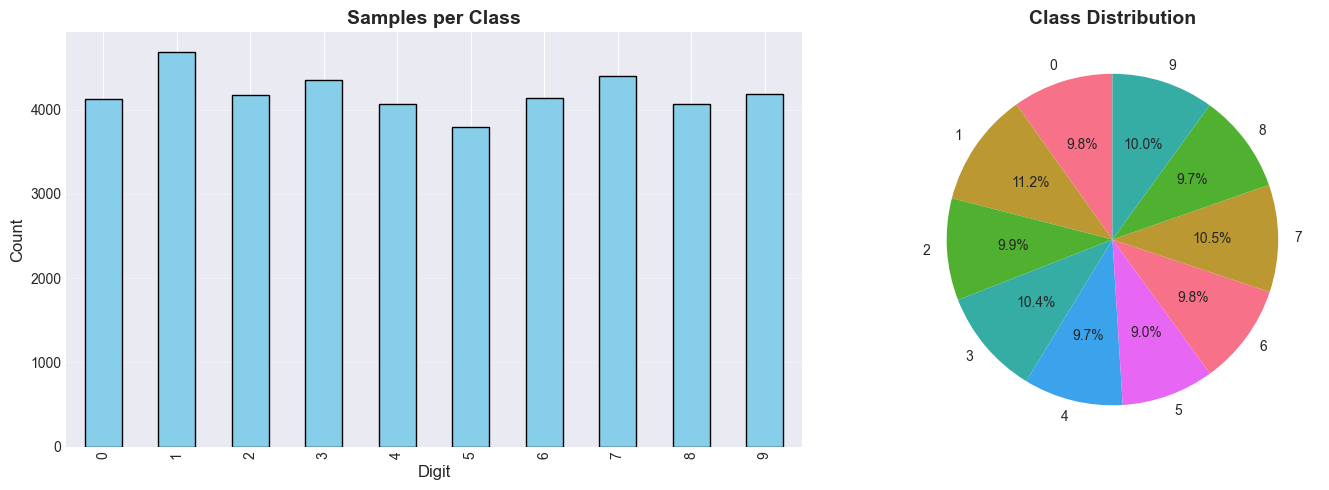

In [6]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart
label_counts.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Samples per Class', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Digit', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Class Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Pixel Data Statistics

In [7]:
# Extract pixel data (exclude label)
pixel_data = train_df.drop('label', axis=1).values

print("=" * 60)
print("Pixel Data Statistics")
print("=" * 60)
print(f"Mean pixel value: {pixel_data.mean():.2f}")
print(f"Standard deviation: {pixel_data.std():.2f}")
print(f"Min value: {pixel_data.min()}")
print(f"Max value: {pixel_data.max()}")
print()

# Non-zero pixel ratio
non_zero_ratio = np.count_nonzero(pixel_data) / pixel_data.size
print(f"Non-zero pixel ratio: {non_zero_ratio*100:.2f}%")
print(f"Zero pixel ratio: {(1-non_zero_ratio)*100:.2f}%")

Pixel Data Statistics
Mean pixel value: 33.41
Standard deviation: 78.68
Min value: 0
Max value: 255

Non-zero pixel ratio: 19.15%
Zero pixel ratio: 80.85%


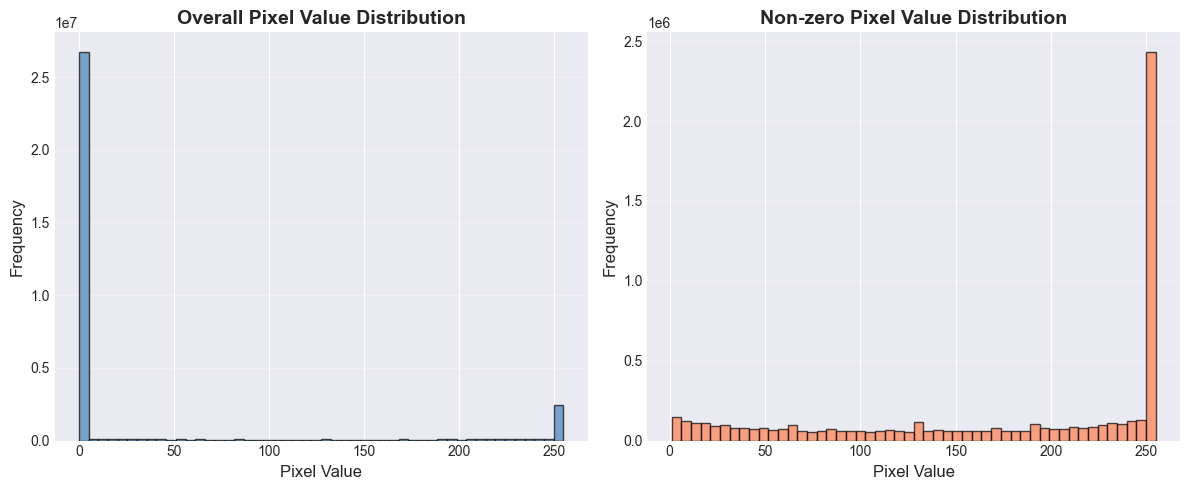

In [8]:
# Pixel value distribution histogram
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(pixel_data.flatten(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Overall Pixel Value Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Pixel Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Non-zero pixels only
plt.subplot(1, 2, 2)
non_zero_pixels = pixel_data[pixel_data > 0]
plt.hist(non_zero_pixels, bins=50, color='coral', edgecolor='black', alpha=0.7)
plt.title('Non-zero Pixel Value Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Pixel Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Sample Image Visualization

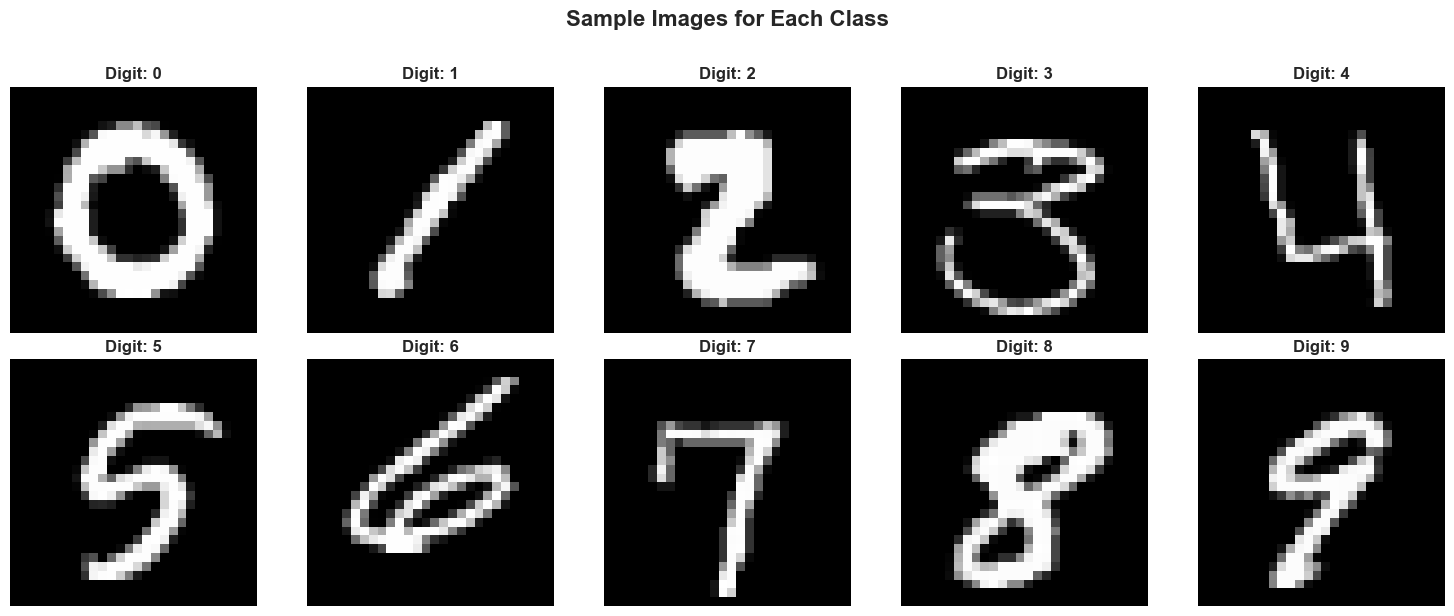

In [9]:
# First sample for each class
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for digit in range(10):
    # Find first sample of this digit
    sample = train_df[train_df['label'] == digit].iloc[0]
    image = sample.drop('label').values.reshape(28, 28)
    
    axes[digit].imshow(image, cmap='gray')
    axes[digit].set_title(f'Digit: {digit}', fontsize=12, fontweight='bold')
    axes[digit].axis('off')

plt.suptitle('Sample Images for Each Class', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

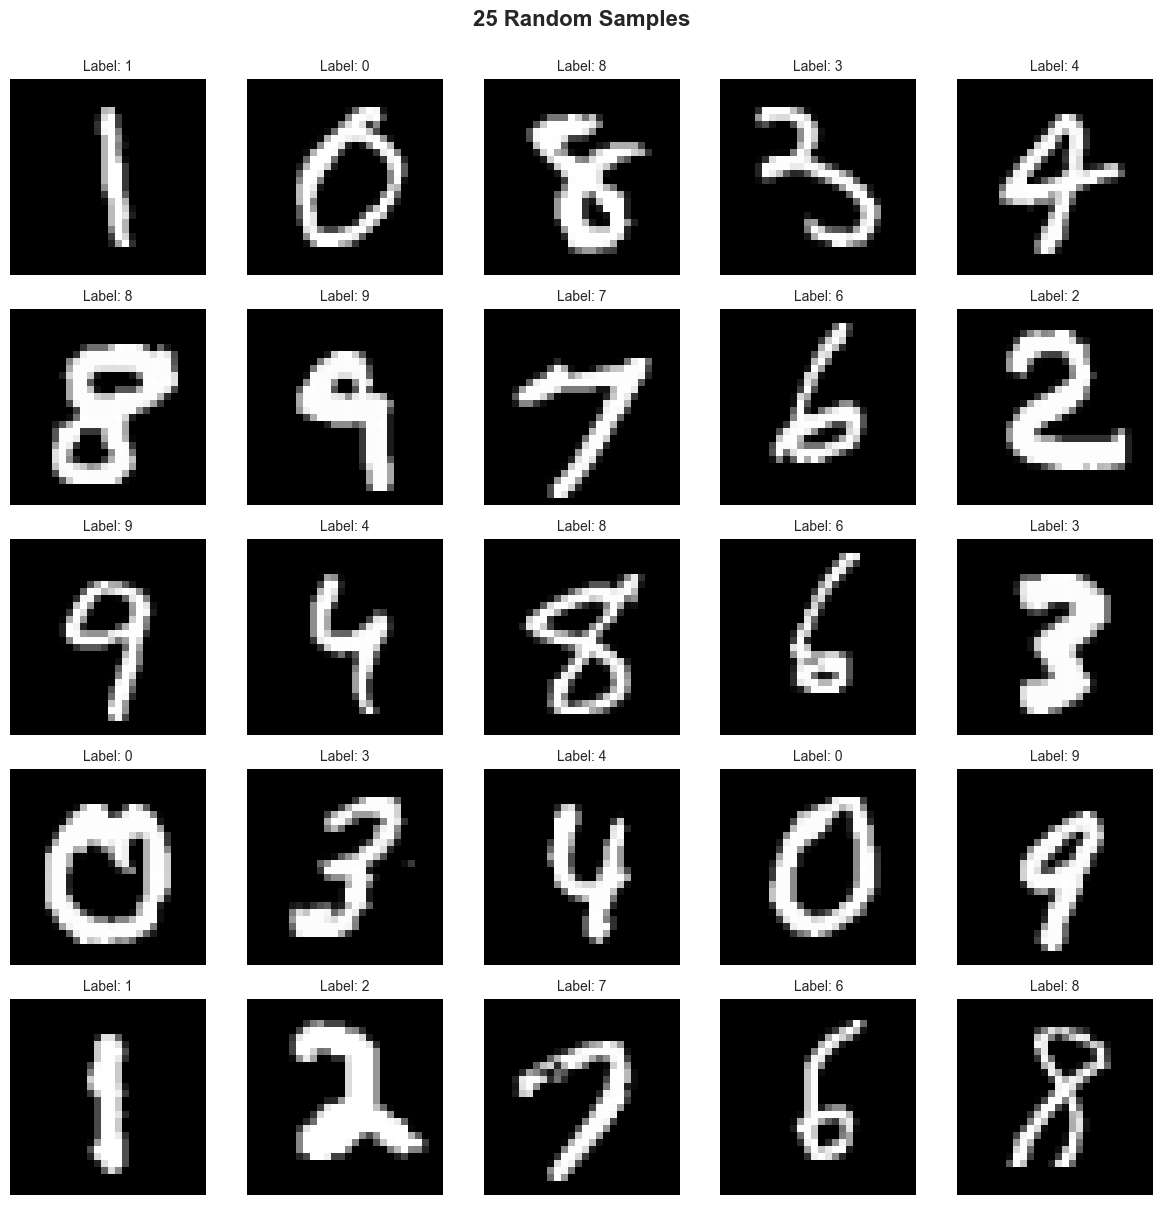

In [10]:
# 25 random samples
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
axes = axes.flatten()

random_indices = np.random.choice(len(train_df), 25, replace=False)

for idx, ax in zip(random_indices, axes):
    sample = train_df.iloc[idx]
    image = sample.drop('label').values.reshape(28, 28)
    label = sample['label']
    
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {label}', fontsize=10)
    ax.axis('off')

plt.suptitle('25 Random Samples', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()
plt.show()

## 7. Mean Images per Class

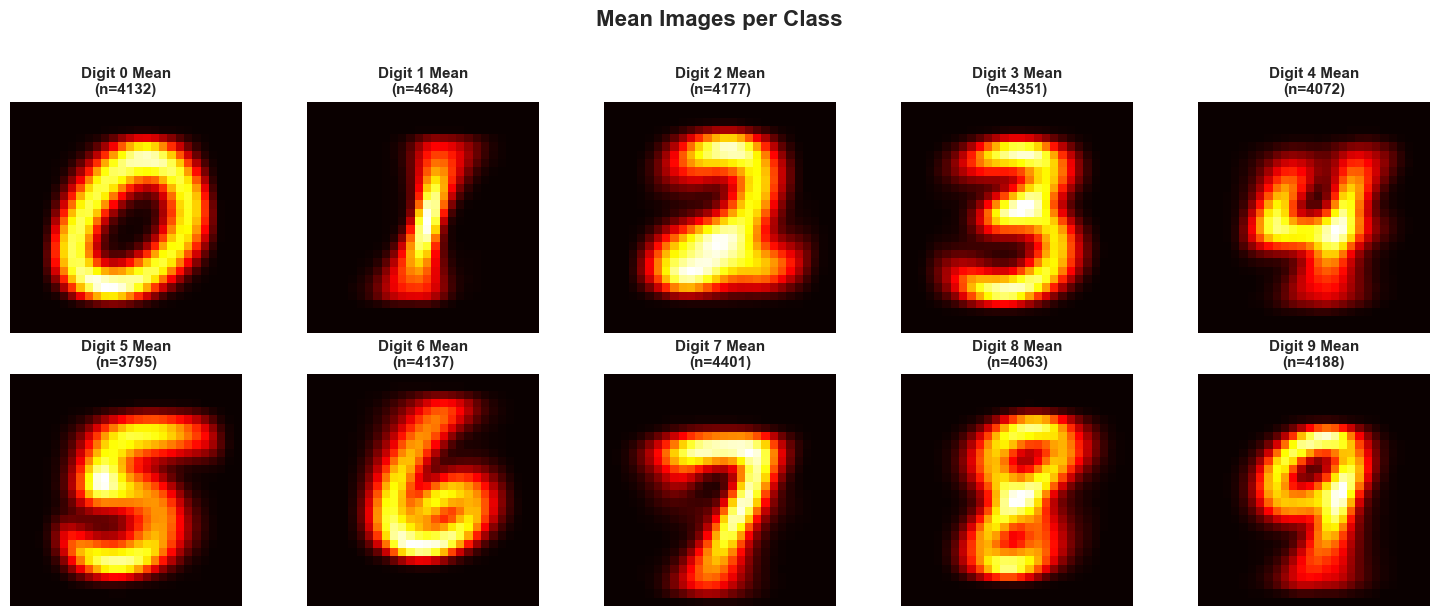

In [11]:
# Calculate and visualize mean image for each class
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for digit in range(10):
    # Extract all samples for this digit
    digit_samples = train_df[train_df['label'] == digit].drop('label', axis=1).values
    
    # Calculate mean image
    mean_image = digit_samples.mean(axis=0).reshape(28, 28)
    
    axes[digit].imshow(mean_image, cmap='hot')
    axes[digit].set_title(f'Digit {digit} Mean\n(n={len(digit_samples)})', fontsize=11, fontweight='bold')
    axes[digit].axis('off')

plt.suptitle('Mean Images per Class', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 8. Pixel-wise Variance Analysis

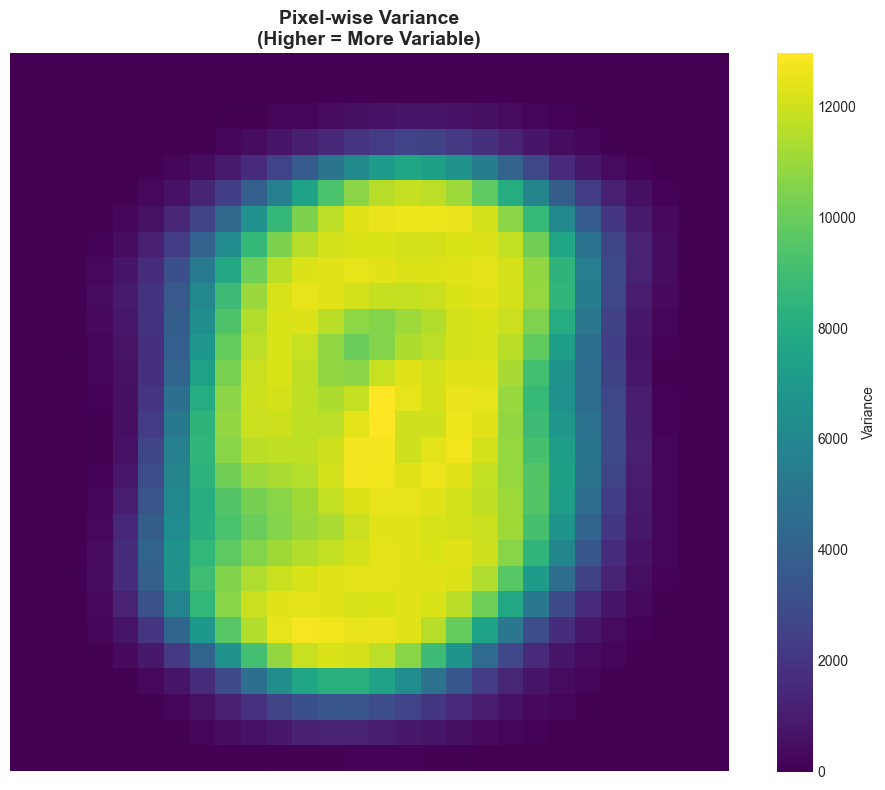


Highest variance pixel position: (14, 14)
Lowest variance pixel position: (0, 0)


In [12]:
# Calculate variance for each pixel position
pixel_variance = train_df.drop('label', axis=1).var(axis=0).values.reshape(28, 28)

plt.figure(figsize=(10, 8))
plt.imshow(pixel_variance, cmap='viridis')
plt.colorbar(label='Variance')
plt.title('Pixel-wise Variance\n(Higher = More Variable)', fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"\nHighest variance pixel position: {np.unravel_index(pixel_variance.argmax(), pixel_variance.shape)}")
print(f"Lowest variance pixel position: {np.unravel_index(pixel_variance.argmin(), pixel_variance.shape)}")

## 9. Per-Class Pixel Statistics

In [13]:
# Statistics per class
class_stats = []

for digit in range(10):
    digit_data = train_df[train_df['label'] == digit].drop('label', axis=1).values
    
    stats = {
        'Digit': digit,
        'Count': len(digit_data),
        'Mean': digit_data.mean(),
        'Std': digit_data.std(),
        'Non-zero %': (np.count_nonzero(digit_data) / digit_data.size) * 100
    }
    class_stats.append(stats)

stats_df = pd.DataFrame(class_stats)
print(stats_df.to_string(index=False))

 Digit  Count      Mean       Std  Non-zero %
     0   4132 44.173989 88.634219   24.457013
     1   4684 19.373044 62.298563   10.935213
     2   4177 38.100892 83.251203   21.552031
     3   4351 36.122689 81.104713   20.857128
     4   4072 30.909085 75.820986   18.048407
     5   3795 32.953980 77.574424   19.484116
     6   4137 35.376170 80.690234   20.179854
     7   4401 29.249036 74.456334   16.762888
     8   4063 38.500189 83.163913   22.190487
     9   4188 31.318559 76.217219   18.271866


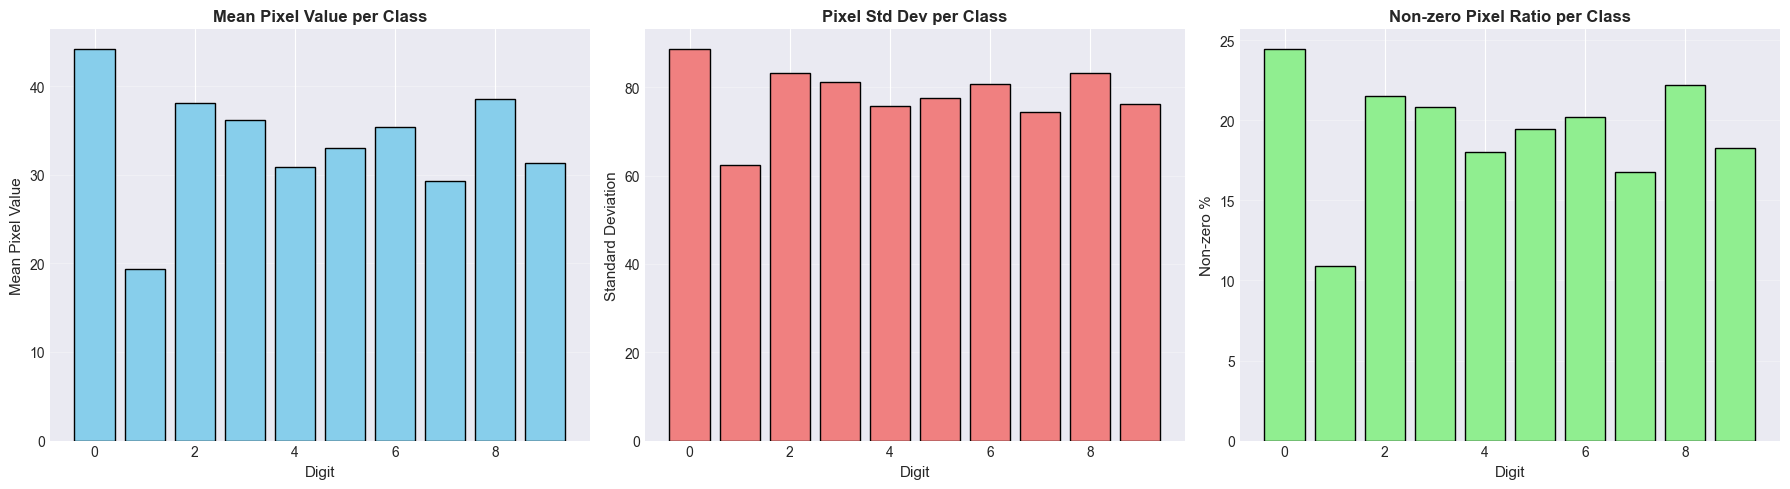

In [14]:
# Visualize class statistics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Mean pixel value
axes[0].bar(stats_df['Digit'], stats_df['Mean'], color='skyblue', edgecolor='black')
axes[0].set_title('Mean Pixel Value per Class', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Digit', fontsize=11)
axes[0].set_ylabel('Mean Pixel Value', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Standard deviation
axes[1].bar(stats_df['Digit'], stats_df['Std'], color='lightcoral', edgecolor='black')
axes[1].set_title('Pixel Std Dev per Class', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Digit', fontsize=11)
axes[1].set_ylabel('Standard Deviation', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

# Non-zero ratio
axes[2].bar(stats_df['Digit'], stats_df['Non-zero %'], color='lightgreen', edgecolor='black')
axes[2].set_title('Non-zero Pixel Ratio per Class', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Digit', fontsize=11)
axes[2].set_ylabel('Non-zero %', fontsize=11)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Data Preprocessing Examples

In [15]:
# Split data
X = train_df.drop('label', axis=1).values
y = train_df['label'].values

print("Original data:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X value range: [{X.min()}, {X.max()}]")
print()

# 1. Normalization (to 0-1 range)
X_normalized = X / 255.0
print("After normalization:")
print(f"X_normalized value range: [{X_normalized.min():.4f}, {X_normalized.max():.4f}]")
print()

# 2. Reshape for CNN
X_reshaped = X_normalized.reshape(-1, 28, 28, 1)
print("After reshaping (for CNN):")
print(f"X_reshaped shape: {X_reshaped.shape}")
print()

# 3. One-hot encoding
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_onehot = lb.fit_transform(y)
print("After one-hot encoding:")
print(f"y_onehot shape: {y_onehot.shape}")
print(f"Example - digit {y[0]} one-hot: {y_onehot[0]}")

Original data:
X shape: (42000, 784)
y shape: (42000,)
X value range: [0, 255]

After normalization:
X_normalized value range: [0.0000, 1.0000]

After reshaping (for CNN):
X_reshaped shape: (42000, 28, 28, 1)

After one-hot encoding:
y_onehot shape: (42000, 10)
Example - digit 1 one-hot: [0 1 0 0 0 0 0 0 0 0]


## 11. Data Augmentation Examples

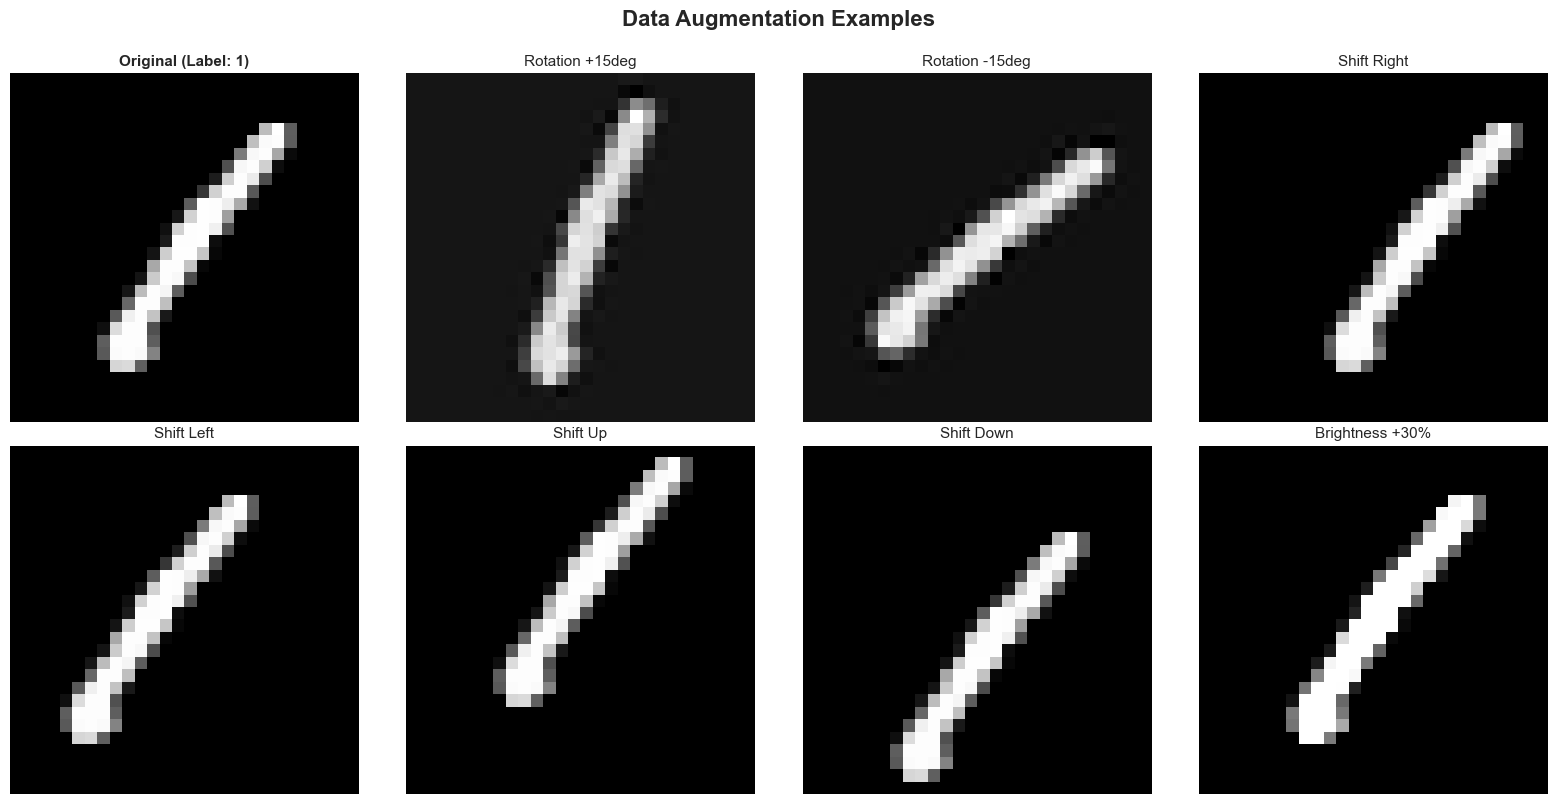

In [16]:
from scipy.ndimage import rotate, shift

# Select sample image
sample_idx = 0
original_image = train_df.iloc[sample_idx].drop('label').values.reshape(28, 28)
label = train_df.iloc[sample_idx]['label']

# Apply various augmentation techniques
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

# Original
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title(f'Original (Label: {label})', fontsize=11, fontweight='bold')
axes[0].axis('off')

# Rotation (+15 degrees)
rotated_15 = rotate(original_image, 15, reshape=False)
axes[1].imshow(rotated_15, cmap='gray')
axes[1].set_title('Rotation +15deg', fontsize=11)
axes[1].axis('off')

# Rotation (-15 degrees)
rotated_m15 = rotate(original_image, -15, reshape=False)
axes[2].imshow(rotated_m15, cmap='gray')
axes[2].set_title('Rotation -15deg', fontsize=11)
axes[2].axis('off')

# Shift (right)
shifted_right = shift(original_image, (0, 3))
axes[3].imshow(shifted_right, cmap='gray')
axes[3].set_title('Shift Right', fontsize=11)
axes[3].axis('off')

# Shift (left)
shifted_left = shift(original_image, (0, -3))
axes[4].imshow(shifted_left, cmap='gray')
axes[4].set_title('Shift Left', fontsize=11)
axes[4].axis('off')

# Shift (up)
shifted_up = shift(original_image, (-3, 0))
axes[5].imshow(shifted_up, cmap='gray')
axes[5].set_title('Shift Up', fontsize=11)
axes[5].axis('off')

# Shift (down)
shifted_down = shift(original_image, (3, 0))
axes[6].imshow(shifted_down, cmap='gray')
axes[6].set_title('Shift Down', fontsize=11)
axes[6].axis('off')

# Brightness adjustment
brightened = np.clip(original_image * 1.3, 0, 255)
axes[7].imshow(brightened, cmap='gray')
axes[7].set_title('Brightness +30%', fontsize=11)
axes[7].axis('off')

plt.suptitle('Data Augmentation Examples', fontsize=16, fontweight='bold', y=1.0)
plt.tight_layout()
plt.show()

## 12. Final Summary and Next Steps

In [17]:
print("=" * 70)
print("Dataset Analysis Summary")
print("=" * 70)
print()
print("Dataset: MNIST Handwritten Digits (Kaggle Digit Recognizer)")
print()
print("Key Features:")
print(f"  - Training samples: {len(train_df):,}")
print(f"  - Test samples: {len(test_df):,}")
print("  - Classes: 0-9 (10 classes)")
print("  - Image size: 28x28 grayscale (784 pixels)")
print("  - Pixel range: 0-255")
print(f"  - Class balance: Relatively balanced (9-11% per class)")
print(f"  - Sparsity: ~80% zero pixels")
print()
print("Data Quality:")
print("  - No missing values")
print("  - No duplicate data")
print("  - Consistent data format")
print()
print("=" * 70)
print("Recommended Next Steps")
print("=" * 70)
print()
print("1. Data Preprocessing:")
print("   - Pixel normalization (0-1 range)")
print("   - Reshape for CNN: (samples, 28, 28, 1)")
print("   - Train/Validation split (e.g., 80/20)")
print()
print("2. Model Selection:")
print("   - Baseline: Simple CNN (LeNet-5 style)")
print("   - Advanced: ResNet, VGG, EfficientNet")
print("   - Consider ensemble methods")
print()
print("3. Data Augmentation:")
print("   - Rotation: +/- 10-15 degrees")
print("   - Shift: +/- 2-3 pixels")
print("   - Zoom: 0.9-1.1x")
print()
print("4. Training Strategy:")
print("   - Loss: Categorical Crossentropy")
print("   - Optimizer: Adam (lr=0.001)")
print("   - Callbacks: EarlyStopping, ReduceLROnPlateau")
print("   - Batch size: 32-128")
print()
print("5. Evaluation:")
print("   - Metrics: Accuracy, Confusion Matrix")
print("   - Error analysis: Analyze misclassified samples")
print("   - Consider cross-validation")
print()
print("=" * 70)

Dataset Analysis Summary

Dataset: MNIST Handwritten Digits (Kaggle Digit Recognizer)

Key Features:
  - Training samples: 42,000
  - Test samples: 28,000
  - Classes: 0-9 (10 classes)
  - Image size: 28x28 grayscale (784 pixels)
  - Pixel range: 0-255
  - Class balance: Relatively balanced (9-11% per class)
  - Sparsity: ~80% zero pixels

Data Quality:
  - No missing values
  - No duplicate data
  - Consistent data format

Recommended Next Steps

1. Data Preprocessing:
   - Pixel normalization (0-1 range)
   - Reshape for CNN: (samples, 28, 28, 1)
   - Train/Validation split (e.g., 80/20)

2. Model Selection:
   - Baseline: Simple CNN (LeNet-5 style)
   - Advanced: ResNet, VGG, EfficientNet
   - Consider ensemble methods

3. Data Augmentation:
   - Rotation: +/- 10-15 degrees
   - Shift: +/- 2-3 pixels
   - Zoom: 0.9-1.1x

4. Training Strategy:
   - Loss: Categorical Crossentropy
   - Optimizer: Adam (lr=0.001)
   - Callbacks: EarlyStopping, ReduceLROnPlateau
   - Batch size: 32-128

